In [11]:
def model_cats_test0_imp0(feats00, id00, iters0, lr0, d0, a0, b0, train_name0, test_name0):
    import warnings
    warnings.simplefilter('ignore')

    import pandas as pd
    import os
    path = os.getcwd()
    parent = os.path.dirname(path)

    #df = pd.read_csv("Consolidated_data_BE1_BE3_MaxMeanRatio_Included_Cl00_No_Outliers_ZZ_train_v01.csv")
    train_name = train_name0
    df = pd.read_csv(parent + '\Data\\' + tr + ".csv")
    df = df.sample(frac=1, random_state = 7) #shuffling
    df = df.reset_index(drop=True)

    XX1 = df.copy()
    feats00 = feats00.copy()
    id0 = id00 #True or False

    import numpy as np
    XX1[XX1==np.inf]=np.nan
    XX1.fillna(1, inplace=True) 
       
        

    from sklearn.model_selection import train_test_split
    X1 = XX1.drop('target', axis=1)
    y1 = XX1[['target']]
    X1_train, y1_train = X1, y1 #Train set
    
    test_name = test_name0 
    df = pd.read_csv(parent + '\Data\\' + ts + ".csv")
    XX1 = df.copy()
    feats00 = feats00.copy()
    id0 = id00 #True or False

    import numpy as np
    XX1[XX1==np.inf]=np.nan
    XX1.fillna(1, inplace=True) 
    
        

    from sklearn.model_selection import train_test_split
    X1 = XX1.drop('target', axis=1)
    y1 = XX1[['target']]
    X1_valid, y1_valid = X1, y1 #Test set
    

    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    import time
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from catboost import CatBoostClassifier
    from sklearn.metrics import classification_report
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import KFold
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import cross_val_score 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.neural_network import MLPClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    import catboost

    a = a0
    b = b0
    iters = iters0
    lr = lr0
    d = d0
    cb_model = CatBoostClassifier(
                                   iterations= iters, #97,
                                   learning_rate= lr, #0.1,
                                   depth= d,#3,
                                   random_seed = 7,
                                   bagging_temperature = 1, #default
                                   logging_level='Silent',
                                   class_weights=[a, b],
                                   devices='0,1'
                                   #thread_count=-1
                                     )

    cb_model.fit(X1_train, y1_train)
    cm1 = confusion_matrix(y1_valid, cb_model.predict(X1_valid))
    total1=sum(sum(cm1))
    roca = round(roc_auc_score(y1_valid, cb_model.predict(X1_valid)),4)
    sens = round(cm1[1,1]/(cm1[1,1]+cm1[0,1]),4)
    spec = round(cm1[0,0]/(cm1[1,0]+cm1[0,0]),4)
    f1sc = round(f1_score(y1_valid, cb_model.predict(X1_valid)),4)
    
    %matplotlib inline 
    import matplotlib.pyplot as plt
    import shap
    
    # feats importance
    fi_l = cb_model.get_feature_importance()
    dfi = pd.DataFrame()
    dfi["feature"] = list(X1.columns)
    dfi["importance"] = fi_l
    dfi = dfi.sort_values(by = "importance", ascending = False)
    #plt.rcParams["figure.figsize"] = (12,7)
    #ax = dfi.plot('feature', 'importance', kind='bar', color='c')
    #ax.set_title("Feature Importance of CatBoost", fontsize = 14)
    ##ax.set_xlabel("Features")
    #plt.show()
    print(". - .")
    print(" ")
    # feats importance LossFunctionChange
    fi0_l = cb_model.get_feature_importance(catboost.Pool(X1_valid, label=y1_valid), type="LossFunctionChange")
    dfi0 = pd.DataFrame()
    dfi0["feature"] = list(X1.columns)
    dfi0["importance"] = fi0_l
    dfi0 = dfi0.sort_values(by = "importance", ascending = False)
    #plt.rcParams["figure.figsize"] = (12,7)
    #ax1 = dfi0.plot('feature', 'importance', kind='bar', color='m')
    #ax1.set_title("Feature Importance of LossFunctionChange", fontsize = 14)
    ##ax1.set_xlabel("Features")
    plt.show()
    print(". -- .")
    print(" ")
    # shap values
    #shap_values = cb_model.get_feature_importance(catboost.Pool(X1_valid, label=y1_valid), type="ShapValues")
    #shap_values = shap_values[:,:-1]
    #shap.summary_plot(shap_values, X1_valid) 
    print(". --- .")
    print(" ")
    print(spec, sens, roca, f1sc)
    return dfi, dfi0


def show_imp(di,di0,k):
    %matplotlib inline 
    import matplotlib.pyplot as plt
    import shap
    dfi = di.head(k)
    # feats importance
    plt.rcParams["figure.figsize"] = (12,7)
    ax = dfi.plot('feature', 'importance', kind='bar', color='c')
    ax.set_title("Feature Importance of CatBoost", fontsize = 14)
    plt.show()
    print(". - .")
    print(" ")
    # feats importance LossFunctionChange
    dfi0 = di0.head(k)
    plt.rcParams["figure.figsize"] = (12,7)
    ax1 = dfi0.plot('feature', 'importance', kind='bar', color='m')
    ax1.set_title("Feature Importance of LossFunctionChange", fontsize = 14)

### Use the tunned Cats to retrieve the intersection features

In [12]:
tr = "datasets\\TrainSet-82-12709_4041_TargetIn"
ts = "datasets\\TestSet-18-12709_4041_TargetIn"
import time
stime = time.time()
di, di0 = model_cats_test0_imp0([],False,200,0.1,4,0.82,0.18,tr,ts)
etime = time.time()
print("time: " + str(etime-stime))

. - .
 
. -- .
 
. --- .
 
0.973 0.9988 0.9942 0.9964
time: 68.77643728256226


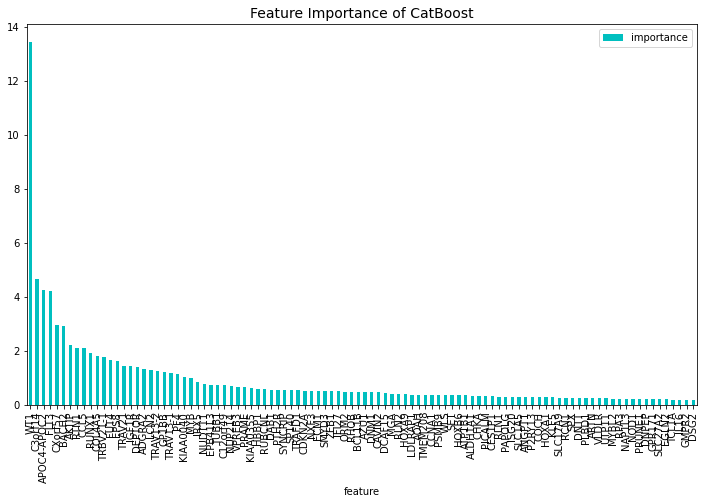

. - .
 


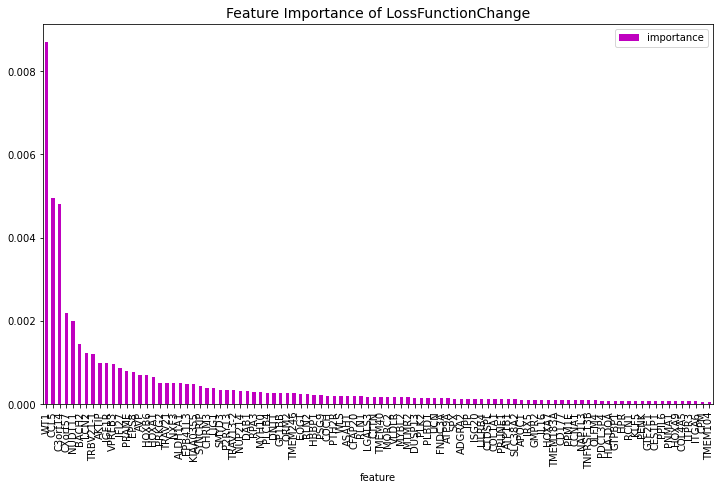

In [13]:
m = 100 # most important features
show_imp(di,di0,m)
cm = list(set(list(di["feature"].head(m))).intersection(set(list(di0["feature"].head(m))))) #Feats & Loss
genes = list(set(list(di["feature"].head(m)))) #Feats

In [14]:
len(cm) #intersection features

55

In [15]:
cm

['HOXB6',
 'COL4A5',
 'ALDH1A1',
 'WT1',
 'P2RY13',
 'NUDT11',
 'ATP1B1',
 'IRX5',
 'TRBV21-1',
 'PRAME',
 'SPX',
 'CXorf57',
 'PTH2R',
 'EPS8',
 'ORM2',
 'SMYD3',
 'KIAA0355',
 'RLN1',
 'IGF1R',
 'VLDLR',
 'RPA3',
 'NXF3',
 'DNTT',
 'TRAV21',
 'HBBP1',
 'GMPR2',
 'ADGRA2',
 'DAB1',
 'MYBL2',
 'NUP214',
 'ISG20',
 'RCN1',
 'CES1P1',
 'PLBD1',
 'BACH2',
 'GP1BB',
 'KLF5',
 'LCN2',
 'SYNCRIP',
 'HOXA1',
 'VPREB3',
 'COCH',
 'CCL5',
 'PRUNE1',
 'C3orf14',
 'IL16',
 'WLS',
 'NAP1L3',
 'IFI27',
 'CCNA1',
 'HOXA9',
 'TRAV13-2',
 'EPB41L3',
 'RLN2',
 'AKTIP']